# E over m  Experiment:  A Model
## Your name here - double-click to edit


Always put your imports at the top. 
The main ones are below, abut add any imports from your simulation package.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from em_Simulation import HH_field, Lorentz_force # These are  functions you will create


## Statement of Problem 

Charges are heated up in  a metal filament using a low voltage, and boil off.  As they boil off, they enter a region of electric field in which they are accelerated towards a positive circular plate.

A hole in the center of the plate allows the charges to continue through in a region in which a magnetic field acts perpendicular to the path of the moving charges.  The path is bent into a semi-circlular path by the magnetic field, and the charges hit the plate a certain distance out from the center of the plate, where their enegery creates a bright spot upon their landing on a fluorescent ring painted on the plate.

Your goal in this simulation is to use a simple Euler integration method to determine how far out from the center of the ring the charges strike, based on the accelerating potential and the magnetic field created by a pair of Helmholts coils.


## Part 1
In the code cell below:
* Define the quantities you will need, using SI units.
* From conservation of energy, code an equation that finds the final velocity of (v_e) an electron that has been accelerated through Vacc
* Print the output velocity for an accelerating potential of 100 Volts.  Check that this is less than the speed of light!



In [3]:
V_i = -60
V_f = -135
dV = (V_f - V_i)  
q = -1.6e-19
m = 9.1e-31

# the electron speed assuming that it is at rest to begin with
e_speed = np.sqrt(2 * q * dV / m)
print("Speed of electron (m/s)", e_speed)  # Helps to label
c = 2.99e8
print("The speed of the electron compared to speed of light:", e_speed/c) #Again, a label

Speed of electron (m/s) 5135525.910130954
The speed of the electron compared to speed of light: 0.017175671940237305


## Part 2

* In the accompanying simulation.py file, create a function that has as input: the number of wraps on the coil (N), the current into the coil in Amps (I), the radius of each coil in meters (L); 
* and that returns the magnetic field strength in SI units.
* The beginning of the function, called HH_field, has been started in the emsimulation.py file

In the code below, check that your function produces a reasonable magnetic field.

In [2]:
# gives the magnitude but not the direction of the B field
Bmag = HH_field(130, 3, 0.15)  # Fixed mu0 in function
# setting the coordinates to align with what's in my notebook
B_field = np.array([Bmag, 0, 0])
print(" Magnetic field from coils (T)", B_field)

Magnetic field from coils (T) [0.00233786 0.         0.        ]


## Part 3
* Create a 3x1 vector array that points the Helmholtz field in the x-direction.
* Create a 3x1 array that initiallizes the velocity of the charge to have the accelerated speed found earlier, and is in the z direction.
* Create a position array initially set to the origin (the hole in the plate)
* Recall how to initialize an array in numpy, ie:  new_array=np.array($[x-value, y-value, z-value]$)
* In simulation.py, create a function that returns a vector representing the Lorentz force on the charge. (Recall there is a np.cross function)
* By using a while loop and the position of the charge, update the velocity and position of the charge in time as it moves through the magnetic field.  Exit the loop when the charge has fallen back to z=0.
* Recall you will need a dt that is reasonable.  Use the speed of the charge, and figure that it will travel a few cm overall (or a fraction of a mm in each time step), to determine a reasonable dt.  Be sure to explain what value you used for dt, and how you determined this
* Be sure to print out the final position of the charge when it lands.  How may the radius of the path be determined from this?



In [4]:



# the lists below will contain the history of the position components
e_x = []
e_y = []
e_z = []

e_vel = np.array([0, 0, e_speed])
e_mom = m * e_vel
e_pos = np.array([0, 0, 0])

t = 0
dt = 1e-12  # Way too small--I upped this

while e_pos[2] >= 0:
    
    e_force = Lorentz_force(q, e_vel, B_field)
    e_mom = e_mom + e_force * dt
    e_vel = e_mom / m
    e_pos = e_pos + e_vel * dt
    
    # below are 
    e_x.append(e_pos[0])
    e_y.append(e_pos[1])
    e_z.append(e_pos[2])
    
    t += dt
    

# below is the history of the position components as arrays
print("Final position of electron on plate:", e_pos)
x_array = np.array(e_x)
y_array = np.array(e_y)
z_array = np.array(e_z)

Final position of electron on plate: [ 0.00000000e+00 -2.49952993e-02 -9.68436643e-07]


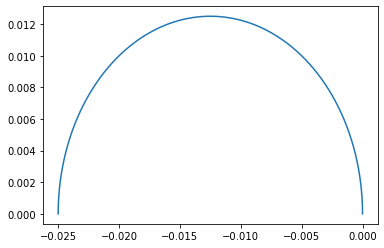

In [6]:
plt.plot(y_array, z_array)

## Part 4:  BONUS
* Try making a plot of the position as the charge moves through the magnetic field.  The particle should move solely in the z-y plane.
* Python plotting will not plot nicely in a loop, so you will have to store the x, y, z positions in arrays while the loop executes.
* However, python needs to know the size of an array to create an array, and this is unknown before the loop executes.
*A workaround is to create empty lists for the x, y, z posittions, and append to these as the loop executes.  The lists may be converted to arrays after the loop is done.

